# **Cuaderno introducción a Dask**
Andrey Duvan Rincon Torres

---



Mejores prácticas con dask.delayed

## **Introducción**
Es fácil comenzar con Dask retrasado, pero usarlo bien requiere algo de experiencia. Esta lección contiene sugerencias de mejores prácticas e incluye soluciones a problemas comunes.



## **Paralelizar código con dask.delayed**

En esta sección, paralelizamos el código de estilo de bucle for simple con Dask y dask.delayed. A menudo, esta es la única función que necesitará para convertir funciones para usar con Dask. Esta es una forma sencilla de usar daskpara paralelizar bases de código existentes o construir sistemas complejos.

Como veremos en el cuaderno del planificador distribuido , Dask tiene varias formas de ejecutar código en paralelo. Usaremos el programador distribuido creando un archivo dask.distributed.Client. Por ahora, esto nos proporcionará algunos buenos diagnósticos. Hablaremos de los programadores en profundidad más adelante.

In [2]:
from dask.distributed import Client
client = Client(processes=False)

C:\Users\adrin\.conda\envs\PLN_2022_1\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55120 instead
  warnings.warn(


## **Fundamentos** 
Primero hagamos algunas funciones de juguete, incy addque duerman un rato para simular el trabajo. Luego, programaremos la ejecución de estas funciones con normalidad. En la siguiente sección, paralelizaremos este código.

In [4]:
from time import sleep
def inc(x):
    sleep(1)
    return x + 1
def add(x, y):
    sleep(1)
    return x + y

Programamos la ejecución de este código normal usando la %%timemagia, que es una función especial de Jupyter Notebook.

In [5]:
%%time
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: total: 46.9 ms
Wall time: 3.03 s


## ** Paralelizar con el dask.delayeddecorador **

Esas dos llamadas de incremento podrían llamarse en paralelo, porque son totalmente independientes entre sí.

Transformaremos las funciones `incy` addusando la `dask.delayedfuncion`. Cuando llamamos a la versión retrasada pasando los argumentos, exactamente como antes, la función original aún no se llama, por lo que la ejecución de la celda finaliza muy rápido. En su lugar, se crea un objeto retrasado , que realiza un seguimiento de la función a llamar y los argumentos que se le pasan.

In [12]:
from dask import delayed
import dask

In [8]:
%%time
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: total: 0 ns
Wall time: 2.14 ms


Esto se ejecutó de inmediato, ya que todavía no ha sucedido nada. Para obtener el resultado, llame al `compute`. Tenga en cuenta que esto se ejecuta más rápido que el código original.

In [9]:
%%time
z.compute()

CPU times: total: 1.05 s
Wall time: 3.02 s


5

## **Paralelizar un ciclo for**
forlos bucles son una de las cosas más comunes que queremos paralelizar. Usamos dask.delayedon incy sumpara paralelizar el siguiente cálculo:

In [10]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
%%time
# Sequential code
results = []
for x in data:
    y = inc(x)
    results.append(y)
total = sum(results)

CPU times: total: 78.1 ms
Wall time: 8.07 s


In [14]:
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)
result = total.compute()

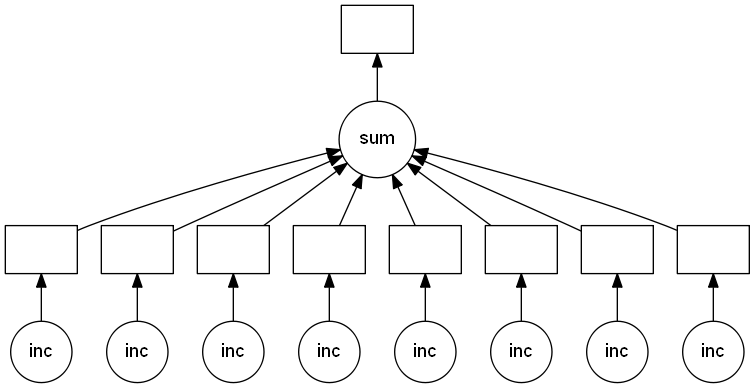

In [19]:
total.visualize()

## **Paralelizar un código for-loop con flujo de control**

A menudo queremos retrasar solo algunas funciones, ejecutando algunas de ellas inmediatamente. Esto es especialmente útil cuando esas funciones son rápidas y nos ayudan a determinar qué otras funciones más lentas debemos llamar. Esta decisión, retrasar o no retrasar, generalmente es donde debemos ser reflexivos cuando usamos dask.delayed.

En el siguiente ejemplo, iteramos a través de una lista de entradas. Si esa entrada es par entonces queremos llamar a inc. Si la entrada es impar, entonces queremos llamar a double. Esta is_evendecisión de llamar inco doubledebe tomarse de inmediato (no con pereza) para que nuestro código Python de creación de gráficos continúe.


In [20]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
%%time
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: total: 141 ms
Wall time: 10.1 s


In [22]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

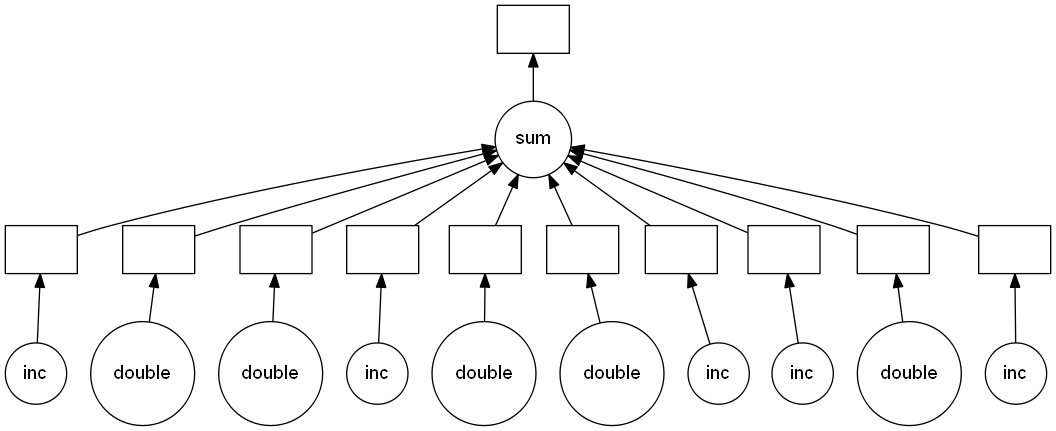

In [23]:
total.visualize()

# **Cerrar el Cliente**

In [25]:
client.close()